# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Deviation across all candidates

In [212]:
tv2q = pd.read_excel("tv2q.xlsx")
tv2q = tv2q.drop(['type', 'depends'], axis=1)
tv2q = tv2q.rename(columns={
    'id': 'ID',
    'header': 'Title',
    'question' : 'Question'
})
drq = pd.read_excel("drq.xlsx") 
drq = drq.drop(['Info', 'WordMerger', 'ID_CandidateQuestionType', 'QuestionListData',
              'ArgumentFor', 'ArgumentAgainst', 'Rule', 'QuestionListData'], axis=1)
questions = pd.concat([tv2q, drq])
questions.shape

(99, 3)

In [213]:
df = pd.read_excel("alldata.xlsx")
display(df.shape)

(867, 53)

It seems that the most controversial questions surround handling immigrants and the arne-pension

In [220]:
description = df.drop(columns=['alder'], index=1).describe()
# After taking the standard deviation of all question, we can see that the most dispersed questions are 555, and 556
description = description.iloc[2].sort_values(ascending=False).to_frame().reset_index().rename(columns={'index': 'ID'})
description['ID'] = description["ID"].astype(str)
questions['ID'] = questions['ID'].astype(str)
combined = (questions.merge(description, how="right", on="ID").sort_values(by="std", ascending=False))
combined.head(10)

,ID,Title,Question,std
0,555,EU OG UDENRIGS,Asylansøgere bør sendes til et land uden for E...,1.659853
1,556,ARBEJDSMARKED OG ØKONOMI,Den såkaldte Arne-pension skal afskaffes,1.646493
2,546,KLIMA OG ENERGI,Danmark skal undersøge muligheden for at udvik...,1.621924
3,10b,Socialområdet,"Den såkaldte Arne-pension, der giver mulighed ...",1.615923
4,531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhø...,1.614926
5,6b,Flygtninge og indvandrere,Det vil være en god idé at etablere et dansk a...,1.605488
6,6a,Flygtninge og indvandrere,Den danske udlændingepolitik er for stram.,1.605232
7,544,DEMOKRATI,Transkønnede under 18 år skal have mulighed fo...,1.603658
8,11b,Mink-sagen,"Det bør undersøges, om Mette Frederiksen kan s...",1.601701
9,550,ARBEJDSMARKED OG ØKONOMI,"Der skal indføres kvoter, der sikrer mindst 30...",1.586611


## Deviation within parties

In [238]:
df = pd.read_excel("alldata.xlsx")
df = df.drop(columns=['storkreds', 'alder', 'navn']).groupby('parti').std() \
    .reset_index().rename(columns={'index': 'parti'})

columns = df.drop(columns=['parti']).columns.to_list()

df['deviation_sum'] = df[columns].sum(axis=1)
df[['parti', 'deviation_sum']].sort_values(by='deviation_sum', ascending=False)

,parti,deviation_sum
8,Løsgænger,71.061293
6,Kristendemokraterne,50.492682
0,Alternativet,44.572776
9,Moderaterne,43.646967
2,Dansk Folkeparti,43.512455
...,...,...
4,Enhedslisten,33.267532
5,"Frie Grønne, Danmarks Nye Venstrefløjsparti",32.696590
13,Socialistisk Folkeparti,32.500525
1,Danmarksdemokraterne,29.835597


## Plot of opinions

In [181]:
df = pd.read_excel("alldata.xlsx")
df = df[['555', '556', 'parti']].groupby('parti').mean()

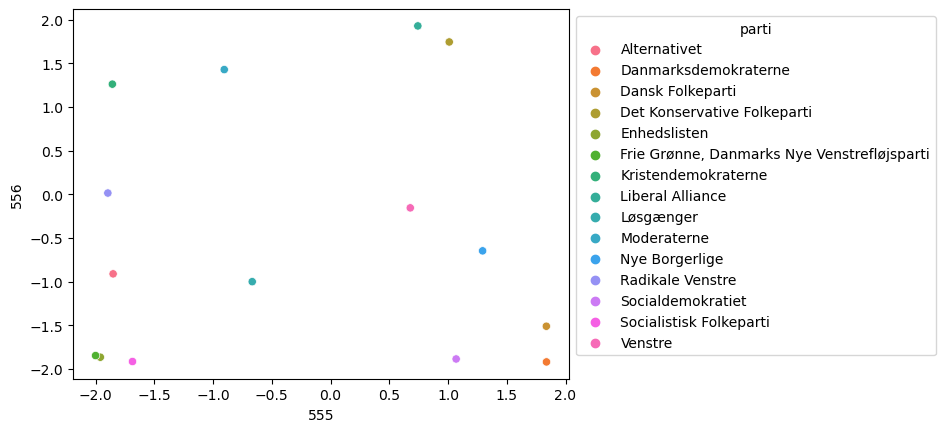

In [187]:

# As mentioned earlier, these 2 questions prove to have most distributed answers
ax = sns.scatterplot(data=df, x="555", y="556", hue="parti", legend=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))